In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [7]:
facebook_df = pd.read_csv("../data/regression/facebook_preprocessed.csv")

In [6]:
facebook_df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0,2752,5091,178,109,...,1640,119,4,79,17,100,0,1,0,0
1,139441,2,12,3,10,0,10460,19057,1457,1361,...,6112,1108,5,130,29,164,0,0,1,0
2,139441,3,12,3,3,0,2413,4373,177,113,...,1503,132,0,66,14,80,0,1,0,0
3,139441,2,12,2,10,1,50128,87991,2211,790,...,32048,1386,58,1572,147,1777,0,1,0,0
4,139441,2,12,2,3,0,7244,13594,671,410,...,3200,396,19,325,49,393,0,1,0,0


In [5]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Page total likes                                                     500 non-null    int64
 1   Category                                                             500 non-null    int64
 2   Post Month                                                           500 non-null    int64
 3   Post Weekday                                                         500 non-null    int64
 4   Post Hour                                                            500 non-null    int64
 5   Paid                                                                 500 non-null    int64
 6   Lifetime Post Total Reach                                            500 non-null    int64
 7   Lifetime Post Total Impres

In [8]:
print(facebook_df.dropna().shape)

(500, 22)


<AxesSubplot:xlabel='Post Month'>

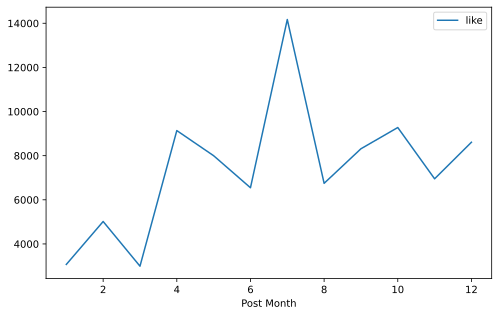

In [9]:
popularity_df = facebook_df[['Post Month'] + ['like']]
popularity_df.groupby('Post Month').sum().plot()

<AxesSubplot:xlabel='Post Month'>

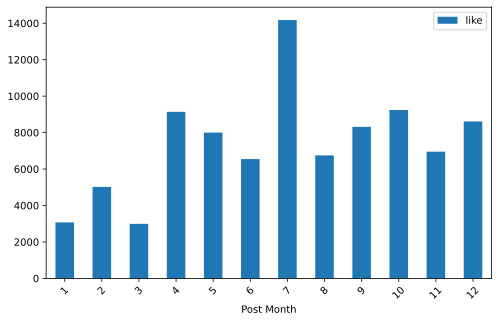

In [23]:
popularity_df.groupby('Post Month').sum().plot(kind='bar', rot=45)

cols = ['studytime', 'G3', 'Medu', 'higher_yes']
sns_plot = sns.pairplot(student_df[cols])
#sns_plot.savefig('pairplot.png')

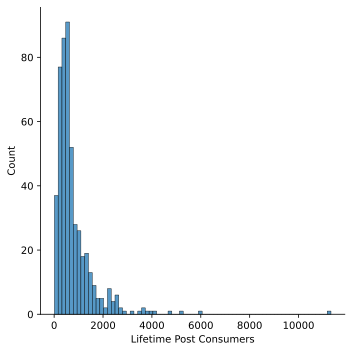

In [10]:
sns.displot(facebook_df['Lifetime Post Consumers'])

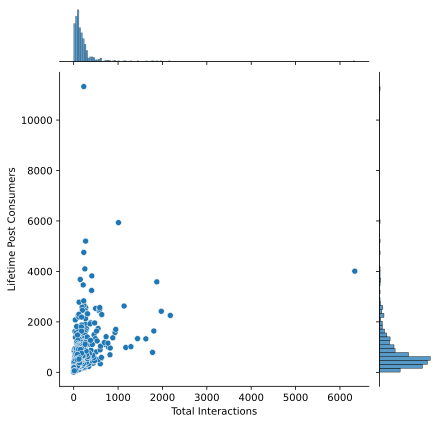

In [11]:
sns.jointplot(data=facebook_df, y='Lifetime Post Consumers', x='Total Interactions')

<AxesSubplot:xlabel='Total Interactions', ylabel='Lifetime Post Consumers'>

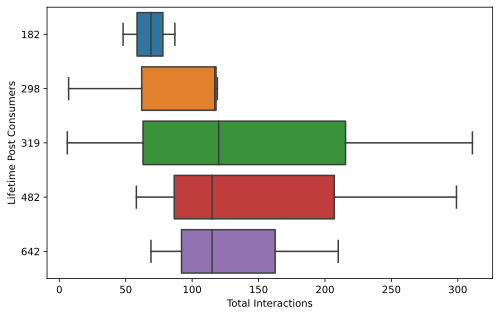

In [12]:
top_consumers = facebook_df["Lifetime Post Consumers"].value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Lifetime Post Consumers", x="Total Interactions", data=facebook_df[facebook_df["Lifetime Post Consumers"].isin(top_consumers)], orient="h")

In [13]:
facebook_df

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0,2752,5091,178,109,...,1640,119,4,79,17,100,0,1,0,0
1,139441,2,12,3,10,0,10460,19057,1457,1361,...,6112,1108,5,130,29,164,0,0,1,0
2,139441,3,12,3,3,0,2413,4373,177,113,...,1503,132,0,66,14,80,0,1,0,0
3,139441,2,12,2,10,1,50128,87991,2211,790,...,32048,1386,58,1572,147,1777,0,1,0,0
4,139441,2,12,2,3,0,7244,13594,671,410,...,3200,396,19,325,49,393,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,3,1,7,2,0,4684,7536,733,708,...,2876,392,5,53,26,84,0,1,0,0
496,81370,2,1,5,8,0,3480,6229,537,508,...,2104,301,0,53,22,75,0,1,0,0
497,81370,1,1,5,2,0,3778,7216,625,572,...,2388,363,4,93,18,115,0,1,0,0
498,81370,3,1,4,11,0,4156,7564,626,574,...,2452,370,7,91,38,136,0,1,0,0


<AxesSubplot:xlabel='Lifetime Post Consumers', ylabel='Total Interactions'>

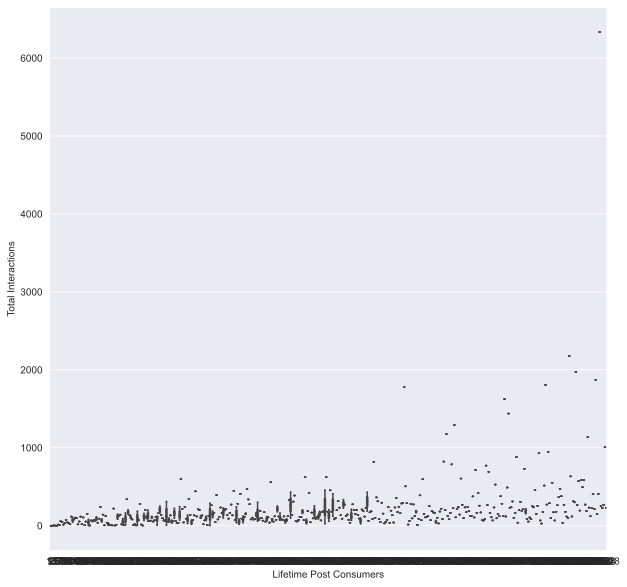

In [40]:
fig, ax = plt.subplots(figsize=(10, 10 ))
sns.boxplot(x=facebook_df['Lifetime Post Consumers'],y=facebook_df['Total Interactions'],ax=ax, showfliers= False)

<AxesSubplot:>

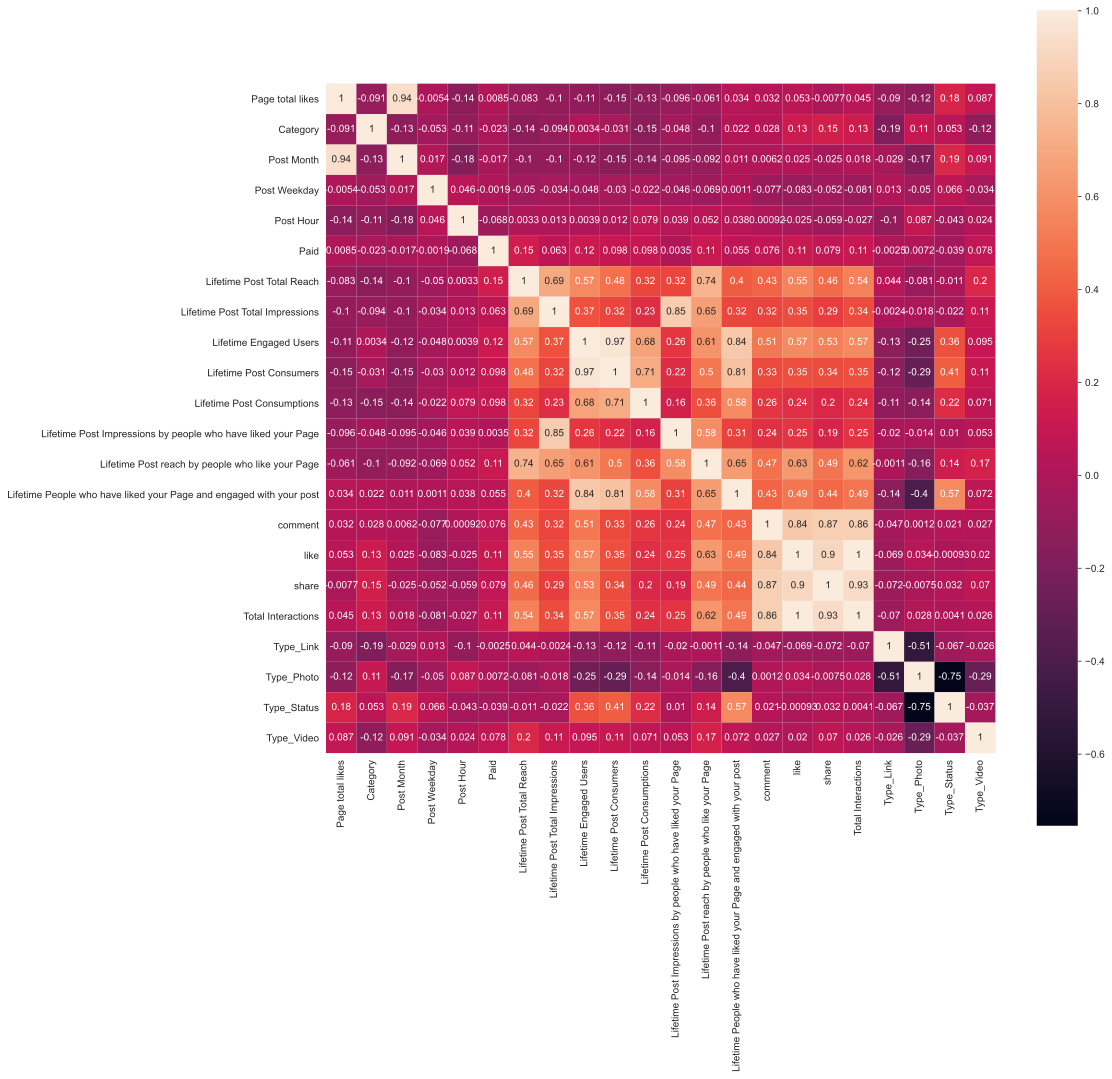

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 15))
sns.heatmap(facebook_df.corr(), square=True, annot=True)